In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [113]:
#관광 지출액 데이터
df = pd.read_excel("최종데이터.xlsx")

#GDP 데이터
gdp=pd.read_excel("GDP.xlsx")

#CPI 데이터
cpi=pd.read_excel("소비자 물가지수.xlsx")

#기대인플레이션율
expect_inflaction=pd.read_excel("기대 인플레이션율.xlsx")

#지역별 방문객
visitor=pd.read_excel("지역별 방문자 수.xlsx")

In [114]:
#항목별 컬럼명
new_columns = ['호텔', '콘도', '캠핑장/펜션', '기타숙박', '면세점', '관관기념품', '레저용품쇼핑', '대형쇼핑몰', '관광유원시설', '골프장','스키장', '기타레저', '문화서비스', '식음료']

#소비데이터 - 강원도
gangwon_df =df[df['시도구분'] == '강원도']
gangwon_df=gangwon_df.transpose()
gangwon_df.columns = new_columns
gangwon_df=gangwon_df.drop(gangwon_df.index[0])
gangwon_df=gangwon_df.drop(gangwon_df.index[0])

In [115]:
#gdp 행렬 변환
gdp=gdp.transpose()

#gdp unnammed 행 제거
gdp= gdp.drop(gdp.index[0])

#기대인플레이션율
expect_inflaction=expect_inflaction.transpose()

#기대인플레이션율 unnammed 행 제거
expect_inflaction= expect_inflaction.drop(expect_inflaction.index[0])

#CPI 행렬 변환
cpi=cpi.transpose()

#CPI unnammed 행 제거
cpi= cpi.drop(cpi.index[0])

In [116]:
#방문객 데이터 전처리
visitor=visitor.transpose()
visitor=visitor.drop(visitor.index[0])
new_columns = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
visitor.columns = new_columns
visitor_gangwon= visitor[['강원도']]
visitor_gunggi = visitor[['경기도']]
visitor_gyungnam = visitor[['경상남도']]
visitor_gyungbuk = visitor[['경상북도']]
visitor_gangju = visitor[['광주광역시']]
visitor_daegu = visitor[['대구광역시']]
visitor_daejeon = visitor[['대전광역시']]
visitor_busan = visitor[['부산광역시']]
visitor_seoul = visitor[['서울특별시']]
visitor_ulsan = visitor[['울산광역시']]
visitor_incheon = visitor[['인천광역시']]
visitor_jeonnam = visitor[['전라남도']]
visitor_jeonbuk = visitor[['전라북도']]
visitor_jej = visitor[['제주특별자치도']]
visitor_chungnam = visitor[['충청남도']]
visitor_chungbuk = visitor[['충청북도']]

In [117]:
#강원 데이터 통합
total_gangwon=pd.concat([gangwon_df, gdp, cpi,expect_inflaction,  visitor_gangwon], axis=1)
new_columns = ['호텔', '콘도', '캠핑장/펜션', '기타숙박', '면세점', '관광기념품', '레저용품쇼핑', '대형쇼핑몰', '관광유원시설', '골프장','스키장', '기타레저', '문화서비스', '식음료', 'gdp','CPI','기대 인플레이션율',  '강원도 관광객']
total_gangwon.columns = new_columns

In [118]:
#강원도 통합 데이터에서 호텔 및 예측에 필요한 데이터만 추출
gangwon_hotel=total_gangwon[['호텔', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 콘도 및 예측에 필요한 데이터만 추출
gangwon_condo=total_gangwon[['콘도', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 캠핑장/펜션 및 예측에 필요한 데이터만 추출
gangwon_camping=total_gangwon[['캠핑장/펜션', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 기타숙박 및 예측에 필요한 데이터만 추출
gangwon_elsesleep=total_gangwon[['기타숙박', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 면세점 및 예측에 필요한 데이터만 추출
gangwon_dutyfree=total_gangwon[['면세점', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 관광기념품 및 예측에 필요한 데이터만 추출
gangwon_souvenir=total_gangwon[['관광기념품', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 레저용품쇼핑 및 예측에 필요한 데이터만 추출
gangwon_leisureshop=total_gangwon[['레저용품쇼핑', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 대형쇼핑몰 및 예측에 필요한 데이터만 추출
gangwon_hugeshop=total_gangwon[['대형쇼핑몰', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 관광유원시설 및 예측에 필요한 데이터만 추출
gangwon_amuse=total_gangwon[['관광유원시설', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 골프장 및 예측에 필요한 데이터만 추출
gangwon_golf=total_gangwon[['골프장', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 스키장 및 예측에 필요한 데이터만 추출
gangwon_ski=total_gangwon[['스키장', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 기타레저 및 예측에 필요한 데이터만 추출
gangwon_leisure=total_gangwon[['기타레저', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 문화서비스 및 예측에 필요한 데이터만 추출
gangwon_culture=total_gangwon[['문화서비스', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

#강원도 통합 데이터에서 식음료 및 예측에 필요한 데이터만 추출
gangwon_food=total_gangwon[['식음료', 'gdp','CPI','기대 인플레이션율','강원도 관광객']]

In [122]:
#강원도 예측
# 호텔 예측 학습한 데이터를 다른 데이터로 평가하는 것예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_hotel = gangwon_hotel[gangwon_hotel.columns.difference(['호텔'])]
y_gangwon_hotel = gangwon_hotel['호텔']
X_gangwon_hotel_train , X_gangwon_hotel_test , y_gangwon_hotel_train , y_gangwon_hotel_test = train_test_split(X_gangwon_hotel , y_gangwon_hotel , test_size = 0.2 , random_state = 20)
lr1 = linear_model.LinearRegression()
model1 = lr1.fit(X_gangwon_hotel_train , y_gangwon_hotel_train)

#r강원도 호텔 점수
# RMSE score
y_gangwon_hotel_predictions = lr1.predict(X_gangwon_hotel_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_hotel_train, y_gangwon_hotel_predictions))) 
y_gangwon_hotel_predictions = lr1.predict(X_gangwon_hotel_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_hotel_test, y_gangwon_hotel_predictions)))
# R2 score
print("R2 train: ", model1.score(X_gangwon_hotel_train , y_gangwon_hotel_train))
print("R2 test: ", model1.score(X_gangwon_hotel_test , y_gangwon_hotel_test))
X_gangwon_hotel

RMSE train:  973370.26771653
RMSE test:  1032646.2946390614
R2 train:  0.34927848533543826
R2 test:  0.0791955187026877


,CPI,gdp,강원도 관광객,기대 인플레이션율
2018년 01월,114.7,1898.2,33753511.0,2.6
2018년 02월,114.7,1898.2,31779142.0,2.6
2018년 03월,114.7,1898.2,34794509.0,2.6
2018년 04월,114.7,1898.2,32769020.0,2.6
2018년 05월,114.7,1898.2,38118228.0,2.6
2018년 06월,114.7,1898.2,36739956.0,2.6
2018년 07월,114.7,1898.2,39531130.0,2.6
2018년 08월,114.7,1898.2,42209466.0,2.7
2018년 09월,114.7,1898.2,37482677.0,2.5
2018년 10월,114.7,1898.2,36903290.0,2.5


In [120]:
#강원도 예측
# condo 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_condo = gangwon_condo[gangwon_condo.columns.difference(['콘도'])]
y_gangwon_condo = gangwon_condo['콘도']
X_gangwon_condo_train , X_gangwon_condo_test , y_gangwon_condo_train , y_gangwon_condo_test = train_test_split(X_gangwon_condo , y_gangwon_condo , test_size = 0.2 , random_state = 20)
lr２ = linear_model.LinearRegression()
model２ = lr２.fit(X_gangwon_condo_train , y_gangwon_condo_train)

#강원도 condo 점수
# RMSE score
y_gangwon_condo_predictions = lr２.predict(X_gangwon_condo_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_condo_train, y_gangwon_condo_predictions))) 
y_gangwon_condo_predictions = lr２.predict(X_gangwon_condo_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_condo_test, y_gangwon_condo_predictions)))
# R2 score
print("R2 train: ", model２.score(X_gangwon_condo_train , y_gangwon_condo_train))
print("R2 test: ", model２.score(X_gangwon_condo_test , y_gangwon_condo_test))


RMSE train:  2546779.2004833915
RMSE test:  2292431.140586024
R2 train:  0.45359436406275166
R2 test:  -0.31294432758374935


In [78]:
#강원도 예측
# camping 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_camping = gangwon_camping[gangwon_camping.columns.difference(['캠핑장/펜션'])]
y_gangwon_camping = gangwon_camping['캠핑장/펜션']
X_gangwon_camping_train , X_gangwon_camping_test , y_gangwon_camping_train , y_gangwon_camping_test = train_test_split(X_gangwon_camping , y_gangwon_camping , test_size = 0.2 , random_state = 20)
lr3 = linear_model.LinearRegression()
model3 = lr3.fit(X_gangwon_camping_train , y_gangwon_camping_train)

#강원도 camping 점수|
# RMSE score
y_gangwon_camping_predictions = lr3.predict(X_gangwon_camping_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_camping_train, y_gangwon_camping_predictions))) 
y_gangwon_camping_predictions = lr3.predict(X_gangwon_camping_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_camping_test, y_gangwon_camping_predictions)))
# R2 score
print("R2 train: ", model3.score(X_gangwon_camping_train , y_gangwon_camping_train))
print("R2 test: ", model3.score(X_gangwon_camping_test , y_gangwon_camping_test))


RMSE train:  38657.40855495742
RMSE test:  31705.738602444777
R2 train:  0.697858870751345
R2 test:  0.36251534412041686


In [79]:
#강원도 예측
# elsesleep 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_elsesleep = gangwon_elsesleep[gangwon_elsesleep.columns.difference(['기타숙박'])]
y_gangwon_elsesleep = gangwon_elsesleep['기타숙박']
X_gangwon_elsesleep_train , X_gangwon_elsesleep_test , y_gangwon_elsesleep_train , y_gangwon_elsesleep_test = train_test_split(X_gangwon_elsesleep , y_gangwon_elsesleep , test_size = 0.2 , random_state = 20)
lr4 = linear_model.LinearRegression()
model4 = lr4.fit(X_gangwon_elsesleep_train , y_gangwon_elsesleep_train)

#강원도 elsesleep 점수|
# RMSE score
y_gangwon_elsesleep_predictions = lr4.predict(X_gangwon_elsesleep_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_elsesleep_train, y_gangwon_elsesleep_predictions))) 
y_gangwon_elsesleep_predictions = lr4.predict(X_gangwon_elsesleep_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_elsesleep_test, y_gangwon_elsesleep_predictions)))
# R2 score
print("R2 train: ", model4.score(X_gangwon_elsesleep_train , y_gangwon_elsesleep_train))
print("R2 test: ", model4.score(X_gangwon_elsesleep_test , y_gangwon_elsesleep_test))


RMSE train:  775631.5889386304
RMSE test:  1252181.6229842599
R2 train:  0.6867877783849597
R2 test:  0.387507808619624


In [80]:
#강원도 예측
# dutyfree 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_dutyfree = gangwon_dutyfree[gangwon_dutyfree.columns.difference(['면세점'])]
y_gangwon_dutyfree = gangwon_dutyfree['면세점']
X_gangwon_dutyfree_train , X_gangwon_dutyfree_test , y_gangwon_dutyfree_train , y_gangwon_dutyfree_test = train_test_split(X_gangwon_dutyfree , y_gangwon_dutyfree , test_size = 0.2 , random_state = 20)
lr5 = linear_model.LinearRegression()
model5 = lr5.fit(X_gangwon_dutyfree_train , y_gangwon_dutyfree_train)

#강원도 dutyfree 점수|
# RMSE score
y_gangwon_dutyfree_predictions = lr5.predict(X_gangwon_dutyfree_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_dutyfree_train, y_gangwon_dutyfree_predictions))) 
y_gangwon_dutyfree_predictions = lr5.predict(X_gangwon_dutyfree_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_dutyfree_test, y_gangwon_dutyfree_predictions)))
# R2 score
print("R2 train: ", model5.score(X_gangwon_dutyfree_train , y_gangwon_dutyfree_train))
print("R2 test: ", model5.score(X_gangwon_dutyfree_test , y_gangwon_dutyfree_test))


RMSE train:  3284.900162664815
RMSE test:  3078.424504388645
R2 train:  0.28521751152049923
R2 test:  0.4394378733710377


In [81]:
#강원도 예측
# 레저용품쇼핑 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_leisureshop = gangwon_leisureshop[gangwon_leisureshop.columns.difference(['레저용품쇼핑'])]
y_gangwon_leisureshop = gangwon_leisureshop['레저용품쇼핑']
X_gangwon_leisureshop_train , X_gangwon_leisureshop_test , y_gangwon_leisureshop_train , y_gangwon_leisureshop_test = train_test_split(X_gangwon_leisureshop , y_gangwon_leisureshop , test_size = 0.2 , random_state = 20)
lr6 = linear_model.LinearRegression()
model6 = lr6.fit(X_gangwon_leisureshop_train , y_gangwon_leisureshop_train)

#강원도 leisureshop 점수|
# RMSE score
y_gangwon_leisureshop_predictions = lr6.predict(X_gangwon_leisureshop_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_leisureshop_train, y_gangwon_leisureshop_predictions))) 
y_gangwon_leisureshop_predictions = lr6.predict(X_gangwon_leisureshop_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_leisureshop_test, y_gangwon_leisureshop_predictions)))
# R2 score
print("R2 train: ", model6.score(X_gangwon_leisureshop_train , y_gangwon_leisureshop_train))
print("R2 test: ", model6.score(X_gangwon_leisureshop_test , y_gangwon_leisureshop_test))


RMSE train:  1667909.8017619126
RMSE test:  1257290.8648021647
R2 train:  0.07309789063368677
R2 test:  0.06352094039907208


In [82]:
#강원도 예측
# hugeshop 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_hugeshop = gangwon_hugeshop[gangwon_hugeshop.columns.difference(['대형쇼핑몰'])]
y_gangwon_hugeshop = gangwon_hugeshop['대형쇼핑몰']
X_gangwon_hugeshop_train , X_gangwon_hugeshop_test , y_gangwon_hugeshop_train , y_gangwon_hugeshop_test = train_test_split(X_gangwon_hugeshop , y_gangwon_hugeshop , test_size = 0.2 , random_state = 20)
lr7 = linear_model.LinearRegression()
model7 = lr7.fit(X_gangwon_hugeshop_train , y_gangwon_hugeshop_train)

#강원도 hugeshop 점수|
# RMSE score
y_gangwon_hugeshop_predictions = lr７.predict(X_gangwon_hugeshop_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_hugeshop_train, y_gangwon_hugeshop_predictions))) 
y_gangwon_hugeshop_predictions = lr7.predict(X_gangwon_hugeshop_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_hugeshop_test, y_gangwon_hugeshop_predictions)))
# R2 score
print("R2 train: ", model7.score(X_gangwon_hugeshop_train , y_gangwon_hugeshop_train))
print("R2 test: ", model7.score(X_gangwon_hugeshop_test , y_gangwon_hugeshop_test))


RMSE train:  757162.4703819382
RMSE test:  574929.9741074123
R2 train:  0.5473717251021533
R2 test:  0.33487633475314327


In [83]:
#강원도 예측
# amuse 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_amuse = gangwon_amuse[gangwon_amuse.columns.difference(['관광유원시설'])]
y_gangwon_amuse = gangwon_amuse['관광유원시설']
X_gangwon_amuse_train , X_gangwon_amuse_test , y_gangwon_amuse_train , y_gangwon_amuse_test = train_test_split(X_gangwon_amuse , y_gangwon_amuse , test_size = 0.2 , random_state = 20)
lr8 = linear_model.LinearRegression()
model8 = lr8.fit(X_gangwon_amuse_train , y_gangwon_amuse_train)

#강원도 amuse 점수|
# RMSE score
y_gangwon_amuse_predictions = lr8.predict(X_gangwon_amuse_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_amuse_train, y_gangwon_amuse_predictions))) 
y_gangwon_amuse_predictions = lr8.predict(X_gangwon_amuse_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_amuse_test, y_gangwon_amuse_predictions)))
# R2 score
print("R2 train: ", model8.score(X_gangwon_amuse_train , y_gangwon_amuse_train))
print("R2 test: ", model8.score(X_gangwon_amuse_test , y_gangwon_amuse_test))


RMSE train:  208389.10128863037
RMSE test:  247450.4658001435
R2 train:  0.7597793562356213
R2 test:  0.8192979559981275


In [84]:
#강원도 예측
# golf 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_golf = gangwon_golf[gangwon_golf.columns.difference(['골프장'])]
y_gangwon_golf = gangwon_golf['골프장']
X_gangwon_golf_train , X_gangwon_golf_test , y_gangwon_golf_train , y_gangwon_golf_test = train_test_split(X_gangwon_golf , y_gangwon_golf , test_size = 0.2 , random_state = 20)
lr9 = linear_model.LinearRegression()
model9 = lr9.fit(X_gangwon_golf_train , y_gangwon_golf_train)

#강원도 golf 점수|
# RMSE score
y_gangwon_golf_predictions = lr9.predict(X_gangwon_golf_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_golf_train, y_gangwon_golf_predictions))) 
y_gangwon_golf_predictions = lr9.predict(X_gangwon_golf_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_golf_test, y_gangwon_golf_predictions)))
# R2 score
print("R2 train: ", model9.score(X_gangwon_golf_train , y_gangwon_golf_train))
print("R2 test: ", model9.score(X_gangwon_golf_test , y_gangwon_golf_test))


RMSE train:  3594487.6716526384
RMSE test:  5279978.299658617
R2 train:  0.5265244040674817
R2 test:  0.40178328711226485


In [85]:
#강원도 예측
# ski 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_ski = gangwon_ski[gangwon_ski.columns.difference(['스키장'])]
y_gangwon_ski = gangwon_ski['스키장']
X_gangwon_ski_train , X_gangwon_ski_test , y_gangwon_ski_train , y_gangwon_ski_test = train_test_split(X_gangwon_ski , y_gangwon_ski , test_size = 0.2 , random_state = 20)
lr10 = linear_model.LinearRegression()
model10 = lr10.fit(X_gangwon_ski_train , y_gangwon_ski_train)

#강원도 ski 점수|
# RMSE score
y_gangwon_ski_predictions = lr10.predict(X_gangwon_ski_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_ski_train, y_gangwon_ski_predictions))) 
y_gangwon_ski_predictions = lr10.predict(X_gangwon_ski_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_ski_test, y_gangwon_ski_predictions)))
# R2 score
print("R2 train: ", model10.score(X_gangwon_ski_train , y_gangwon_ski_train))
print("R2 test: ", model10.score(X_gangwon_ski_test , y_gangwon_ski_test))


RMSE train:  393821.02272602613
RMSE test:  675229.0721648654
R2 train:  0.11311890393924418
R2 test:  -0.20340625349052255


In [86]:
#강원도 예측
# culture 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_culture = gangwon_culture[gangwon_culture.columns.difference(['문화서비스'])]
y_gangwon_culture = gangwon_culture['문화서비스']
X_gangwon_culture_train , X_gangwon_culture_test , y_gangwon_culture_train , y_gangwon_culture_test = train_test_split(X_gangwon_culture , y_gangwon_culture , test_size = 0.2 , random_state = 20)
lr12 = linear_model.LinearRegression()
model12 = lr12.fit(X_gangwon_culture_train , y_gangwon_culture_train)

#강원도 culture 점수|
# RMSE score
y_gangwon_culture_predictions = lr12.predict(X_gangwon_culture_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_culture_train, y_gangwon_culture_predictions))) 
y_gangwon_culture_predictions = lr12.predict(X_gangwon_culture_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_culture_test, y_gangwon_culture_predictions)))
# R2 score
print("R2 train: ", model12.score(X_gangwon_culture_train , y_gangwon_culture_train))
print("R2 test: ", model12.score(X_gangwon_culture_test , y_gangwon_culture_test))

RMSE train:  536878.988628924
RMSE test:  592467.9098902848
R2 train:  0.37912005790083236
R2 test:  0.24836363145374818


In [87]:
#강원도 예측
# food 예측 학습한 데이터를 다른 데이터로 평가하는 것 예측 테스트(X축에는 예측할 데이터, Y축에는 예측에 고려할 데이터)
X_gangwon_food = gangwon_food[gangwon_food.columns.difference(['식음료'])]
y_gangwon_food = gangwon_food['식음료']
X_gangwon_food_train , X_gangwon_food_test , y_gangwon_food_train , y_gangwon_food_test = train_test_split(X_gangwon_food , y_gangwon_food , test_size = 0.2 , random_state = 20)
lr13 = linear_model.LinearRegression()
model13 = lr13.fit(X_gangwon_food_train , y_gangwon_food_train)

#강원도 food 점수|
# RMSE score
y_gangwon_food_predictions = lr13.predict(X_gangwon_food_train)
print("RMSE train: ", sqrt(mean_squared_error(y_gangwon_food_train, y_gangwon_food_predictions))) 
y_gangwon_food_predictions = lr13.predict(X_gangwon_food_test)
print("RMSE test: ", sqrt(mean_squared_error(y_gangwon_food_test, y_gangwon_food_predictions)))
# R2 score
print("R2 train: ", model13.score(X_gangwon_food_train , y_gangwon_food_train))
print("R2 test: ", model13.score(X_gangwon_food_test , y_gangwon_food_test))

RMSE train:  6272523.367189043
RMSE test:  3149404.4235890894
R2 train:  0.751475352720028
R2 test:  0.9112391274922811


In [88]:
# 강원도 예측에 고려할 공통 데이터
#GDP 상승률 1.4% 가정
gdp_2023=gdp.iloc[-12:]
gdp_2023=gdp_2023*1.014
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 12월']
gdp_2023.index = new_columns

#CPI 상승률 3.1 가정
cpi_2023=cpi.iloc[-12:]
cpi_2023=cpi_2023*1.031
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 12월']
cpi_2023.index = new_columns

#기대인플레이션율 상승률 2% 가정
expect_inflaction_2023=expect_inflaction.iloc[-12:]
expect_inflaction_2023=expect_inflaction_2023*1.031
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 12월']
expect_inflaction_2023.index = new_columns

#관광객 상승률 4% 가정
visitor_gangwon_2023=visitor_gangwon.iloc[-12:]
visitor_gangwon_2023=visitor_gangwon_2023*1.04
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 12월']
visitor_gangwon_2023.index = new_columns

# Y축 데이터 통합(강원도_호텔)
gangwon_practice = pd.concat([gdp_2023, cpi_2023,expect_inflaction_2023, visitor_gangwon_2023], axis=1)
new_columns = ['gdp', 'CPI', '기대 인플레이션율', '강원도 관광객']
gangwon_practice.columns = new_columns
gangwon_practice

,gdp,CPI,기대 인플레이션율,강원도 관광객
2023년 01월,2267.6082,128.5657,2.6806,40143187.76
2023년 02월,2267.6082,128.5657,2.7837,34373865.76
2023년 03월,2267.6082,128.5657,2.9899,38514748.48
2023년 04월,2267.6082,128.5657,3.1961,39687502.4
2023년 05월,2267.6082,128.5657,3.4023,44330206.96
2023년 06월,2267.6082,128.5657,4.0209,42854458.4
2023년 07월,2267.6082,128.5657,4.8457,47664508.32
2023년 08월,2267.6082,128.5657,4.4333,48421617.92
2023년 09월,2267.6082,128.5657,4.3302,43579991.52
2023년 10월,2267.6082,128.5657,4.4333,46574601.84


In [89]:
# 스케일링할 데이터 선택
X_practice = gangwon_practice.values

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
X_practice_scaled = scaler.fit_transform(X_practice)

# 스케일링된 데이터를 DataFrame으로 변환
gangwon_practice_scaled = pd.DataFrame(X_practice_scaled, columns=gangwon_practice.columns)
gangwon_practice_scaled

,gdp,CPI,기대 인플레이션율,강원도 관광객
0,4.547474e-13,-2.842171e-14,-1.557736,-0.594262
1,4.547474e-13,-2.842171e-14,-1.411698,-2.080955
2,4.547474e-13,-2.842171e-14,-1.119622,-1.013894
3,4.547474e-13,-2.842171e-14,-0.827547,-0.711687
4,4.547474e-13,-2.842171e-14,-0.535472,0.484688
5,4.547474e-13,-2.842171e-14,0.340755,0.104403
6,4.547474e-13,-2.842171e-14,1.509056,1.343902
7,4.547474e-13,-2.842171e-14,0.924906,1.539001
8,4.547474e-13,-2.842171e-14,0.778868,0.291366
9,4.547474e-13,-2.842171e-14,0.924906,1.063045


In [90]:
# 호텔 예측 결과치
X = gangwon_practice_scaled
predict_hotel= lr1.predict(X)
predict_hotel = np.round(predict_hotel, decimals=1)
predict_hotel[predict_hotel < 0] = -predict_hotel[predict_hotel < 0]
predict_hotel=predict_hotel

predict=pd.DataFrame([predict_hotel])
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 12월']
predict.columns=new_columns
predict=predict.transpose()
predict.columns=['2023년 강원도 호텔 소비 예측치']


#1월 ~ 12월 예측 데이터 각 변수에 저장
g_hotel_23_jan=predict_hotel[0]
g_hotel_23_feb=predict_hotel[1]
g_hotel_23_mar=predict_hotel[2]
g_hotel_23_apr=predict_hotel[3]
g_hotel_23_may=predict_hotel[4]
g_hotel_23_jun=predict_hotel[5]
g_hotel_23_jul=predict_hotel[6]
g_hotel_23_aug=predict_hotel[7]
g_hotel_23_sep=predict_hotel[8]
g_hotel_23_oct=predict_hotel[9]
g_hotel_23_nov=predict_hotel[10]
g_hotel_23_dec=predict_hotel[11]

predict

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


NameError: name 'predict' is not defined

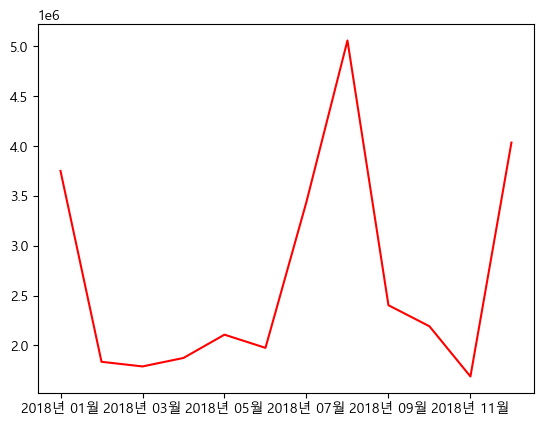

In [91]:
# 호텔 비교 그래프 근데 왜 이러냐 
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

gangwon_hotel = gangwon_hotel['호텔'][ : 12].sort_index()
gangwon_hotel.plot(color = 'red')
predict['2023년 강원도 호텔 소비 예측치'].plot(color = 'blue')
rc('font', family=font_name)

In [92]:
# 콘도 예측 결과치
X = gangwon_practice_scaled
predict_condo = lr2.predict(X)
predict_condo = np.round(predict_condo, decimals=1)
predict_condo[predict_condo < 0] = -predict_condo[predict_condo < 0]
predict_condo = predict_condo

predict=pd.DataFrame([predict_condo])
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 12월']
predict.columns=new_columns
predict=predict.transpose()
predict.columns=['2023년 강원도 콘도 소비 예측치']

# 1월 ~ 12월 예측 데이터 각 변수에 저장
g_condo_23_jan=predict_condo[0]
g_condo_23_feb=predict_condo[1]
g_condo_23_mar=predict_condo[2]
g_condo_23_apr=predict_condo[3]
g_condo_23_may=predict_condo[4]
g_condo_23_jun=predict_condo[5]
g_condo_23_jul=predict_condo[6]
g_condo_23_aug=predict_condo[7]
g_condo_23_sep=predict_condo[8]
g_condo_23_oct=predict_condo[9]
g_condo_23_nov=predict_condo[10]
g_condo_23_dec=predict_condo[11]

predict


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


NameError: name 'predict' is not defined

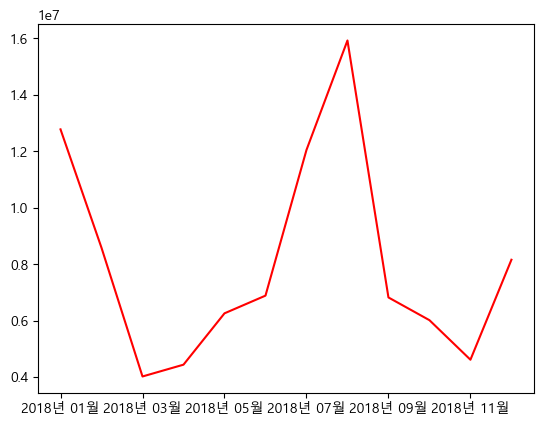

In [57]:
# 콘도 비교 그래프 근데 왜 이러냐 
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

gangwon_condo = gangwon_condo['콘도'][ : 12].sort_index()
gangwon_condo.plot(color = 'red')
predict['2023년 강원도 콘도 소비 예측치'].plot(color = 'blue')
rc('font', family=font_name)

In [58]:
# 캠핑장 예측 결과치
X = gangwon_practice_scaled
predict_camping = lr3.predict(X)
predict_camping = np.round(predict_camping, decimals=1)
predict_camping[predict_camping < 0] = -predict_camping[predict_camping < 0]
predict_camping = predict_camping

predict=pd.DataFrame([predict_camping])
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 12월']
predict.columns=new_columns
predict=predict.transpose()
predict.columns=['2023년 강원도 캠핑장 소비 예측치']

# 1월 ~ 12월 예측 데이터 각 변수에 저장
g_camping_23_jan=predict_camping[0]
g_camping_23_feb=predict_camping[1]
g_camping_23_mar=predict_camping[2]
g_camping_23_apr=predict_camping[3]
g_camping_23_may=predict_camping[4]
g_camping_23_jun=predict_camping[5]
g_camping_23_jul=predict_camping[6]
g_camping_23_aug=predict_camping[7]
g_camping_23_sep=predict_camping[8]
g_camping_23_oct=predict_camping[9]
g_camping_23_nov=predict_camping[10]
g_camping_23_dec=predict_camping[11]

predict


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


NameError: name 'predict' is not defined

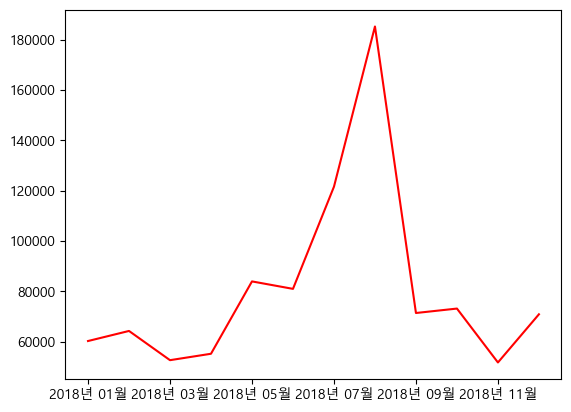

In [59]:
# 캠핑장 비교 그래프 근데 왜 이러냐 
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

gangwon_camping = gangwon_camping['캠핑장/펜션'][ : 12].sort_index()
gangwon_camping.plot(color = 'red')
predict['2023년 강원도 캠핑장 소비 예측치'].plot(color = 'blue')
rc('font', family=font_name)

In [60]:
# 기타숙박 예측 결과치
X = gangwon_practice_scaled
predict_elsesleep = lr4.predict(X)
predict_elsesleep = np.round(predict_elsesleep, decimals=1)
predict_elsesleep[predict_elsesleep < 0] = -predict_elsesleep[predict_elsesleep < 0]
predict_elsesleep = predict_elsesleep

predict=pd.DataFrame([predict_elsesleep])
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 14월']
predict.columns=new_columns
predict=predict.transpose()
predict.columns=['2023년 강원도 기타숙박 소비 예측치']

# 1월 ~ 12월 예측 데이터 각 변수에 저장
g_elsesleep_23_jan=predict_elsesleep[0]
g_elsesleep_23_feb=predict_elsesleep[1]
g_elsesleep_23_mar=predict_elsesleep[2]
g_elsesleep_23_apr=predict_elsesleep[3]
g_elsesleep_23_may=predict_elsesleep[4]
g_elsesleep_23_jun=predict_elsesleep[5]
g_elsesleep_23_jul=predict_elsesleep[6]
g_elsesleep_23_aug=predict_elsesleep[7]
g_elsesleep_23_sep=predict_elsesleep[8]
g_elsesleep_23_oct=predict_elsesleep[9]
g_elsesleep_23_nov=predict_elsesleep[10]
g_elsesleep_23_dec=predict_elsesleep[11]

predict


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


NameError: name 'predict' is not defined

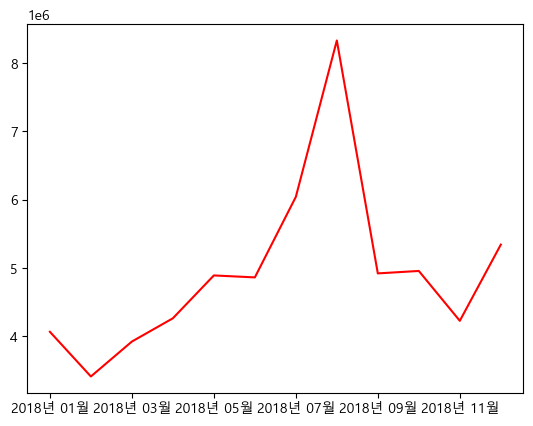

In [61]:
# 기타숙박 비교 그래프 근데 왜 이러냐 
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

gangwon_elsesleep = gangwon_elsesleep['기타숙박'][ : 12].sort_index()
gangwon_elsesleep.plot(color = 'red')
predict['2023년 강원도 기타숙박 소비 예측치'].plot(color = 'blue')
rc('font', family=font_name)

In [62]:
# 면세점 예측 결과치
X = gangwon_practice_scaled
predict_dutyfree = lr5.predict(X)
predict_dutyfree = np.round(predict_dutyfree, decimals=1)
predict_dutyfree[predict_dutyfree < 0] = -predict_dutyfree[predict_dutyfree < 0]
predict_dutyfree = predict_dutyfree

predict=pd.DataFrame([predict_dutyfree])
new_columns = ['2023년 01월', '2023년 02월', '2023년 03월' , '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월', '2023년 10월', '2023년 11월', '2023년 15월']
predict.columns=new_columns
predict=predict.transpose()
predict.columns=['2023년 강원도 면세점 소비 예측치']

# 1월 ~ 12월 예측 데이터 각 변수에 저장
g_dutyfree_23_jan=predict_dutyfree[0]
g_dutyfree_23_feb=predict_dutyfree[1]
g_dutyfree_23_mar=predict_dutyfree[2]
g_dutyfree_23_apr=predict_dutyfree[3]
g_dutyfree_23_may=predict_dutyfree[4]
g_dutyfree_23_jun=predict_dutyfree[5]
g_dutyfree_23_jul=predict_dutyfree[6]
g_dutyfree_23_aug=predict_dutyfree[7]
g_dutyfree_23_sep=predict_dutyfree[8]
g_dutyfree_23_oct=predict_dutyfree[9]
g_dutyfree_23_nov=predict_dutyfree[10]
g_dutyfree_23_dec=predict_dutyfree[11]

predict

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


NameError: name 'predict' is not defined

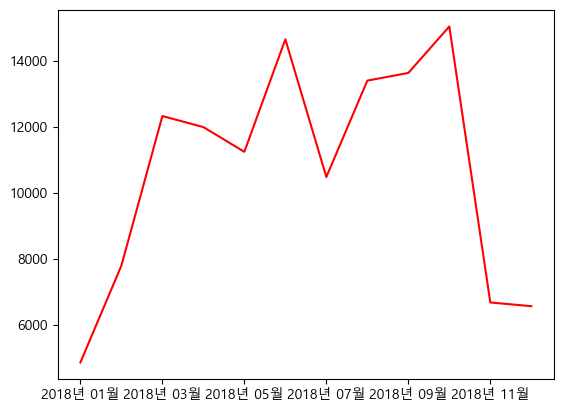

In [63]:
# 면세점 비교 그래프 ㅈㄹ 났네
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

gangwon_dutyfree = gangwon_dutyfree['면세점'][ : 12].sort_index()
gangwon_dutyfree.plot(color = 'red')
predict['2023년 강원도 면세점 소비 예측치'].plot(color = 'blue')
rc('font', family=font_name)

             gdp           CPI  기대 인플레이션율   강원도 관광객
0   4.547474e-13 -2.842171e-14  -1.557736 -0.594262
1   4.547474e-13 -2.842171e-14  -1.411698 -2.080955
2   4.547474e-13 -2.842171e-14  -1.119622 -1.013894
3   4.547474e-13 -2.842171e-14  -0.827547 -0.711687
4   4.547474e-13 -2.842171e-14  -0.535472  0.484688
5   4.547474e-13 -2.842171e-14   0.340755  0.104403
6   4.547474e-13 -2.842171e-14   1.509056  1.343902
7   4.547474e-13 -2.842171e-14   0.924906  1.539001
8   4.547474e-13 -2.842171e-14   0.778868  0.291366
9   4.547474e-13 -2.842171e-14   0.924906  1.063045
10  4.547474e-13 -2.842171e-14   0.778868 -0.045400
11  4.547474e-13 -2.842171e-14   0.194717 -0.380207


C:\Users\wjaud\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([-6127595. , -6545359.2, -6245512.4, -6160591.7, -5824407.3,
       -5931268. , -5582965.8, -5528142.6, -5878731.2, -5661887.5,
       -5973363.1, -6067444.8])